In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# you'll need access to these two files to complete this quiz
#data --> 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
#names --> 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'

In [24]:
# read in the data and assign the columns names in accordance with the 'spambase.names' file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
spam_df = pd.read_csv(url, sep = ',',header= None)

#read names using pd.read that yields a dataframe 
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
file_names = pd.read_table(url)
file_names.columns = ['c1']
names =list()
count = 0

# iterate across all rows of the dataframe
for line in file_names.c1:
    line.strip()
    count = count + 1
    if line.startswith('word') or line.startswith('char_') or line.startswith('capital_') :
        words =line.split()
        names.append(words[0].rstrip(':'))
        count = count + 1

# finally we add the target column 'spam' and pass it to the dataframe to make the column headers
names.append('spam')       
spam_df.columns = names

# looking at data sample
spam_df.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
2279,0.0,0.0,1.58,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.149,0.0,0.149,0.000,0.000,1.482,10,43,0
4479,0.0,0.0,0.86,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.196,0.0,0.049,0.147,0.000,1.100,2,55,0
3089,1.0,0.0,1.00,0.0,1.00,1.00,0.00,0.0,0.0,0.0,...,0.0,0.324,0.0,0.487,0.000,0.000,2.291,22,55,0
1096,0.0,0.0,0.00,0.0,0.45,0.45,0.45,0.0,0.0,0.0,...,0.0,0.000,0.0,0.072,0.000,1.083,7.857,45,440,1
1411,0.0,0.0,1.56,0.0,0.00,0.00,1.56,0.0,0.0,0.0,...,0.0,0.256,0.0,0.769,0.000,0.000,2.125,12,34,1


In [25]:
# conduct preliminary data exploration
def quick_analysis(df):
    st = '\033[1m' + 'Data types of the dataset: ' + '\033[0m' + '\n'
    st = st + str(df.dtypes)
    st = st + '\n'
    st = st + '\033[1m' + 'Number of Rows: ' + '\033[0m' + str(df.shape[0]) + '\n'
    st = st + '\033[1m' + 'Number of Columns: ' + '\033[0m' + str(df.shape[1]) + '\n'
    st = st + '\033[1m' + 'Index Range: ' + '\033[0m' + str(len(df.index)) + '\n'
    st = st + '\033[1m' + 'Column names: ' + '\033[0m' + '\n'
    
    for name in df.columns:
        st = st + str(name +', ' + '\n')
    
    #number of null values
    nv = df.isnull().sum().sum()
    st = st + '\n'
    st = st + '\033[1m' + 'Number of null values: ' + '\033[0m' + str(nv) + '\n'
    st = st + '\033[1m' + 'Mean values: ' + '\033[0m' + str(np.mean(df)) + '\n'
    st = st + '\033[1m' + 'Standard deviations: ' + '\033[0m' + str(np.std(df)) + '\n'
    st = st + '\033[1m' + 'Absolute Average Deviation (AAD): ' + '\033[0m' + str(df.mad()) + '\n'

    return st

print(quick_analysis(spam_df))

Data types of the dataset: 
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl         

## Q1: Run your 'quick_analysis' function... 

In [26]:
# Answer here

print('There are {} emails represented in the dataset\n {}'.format(spam_df.shape[0], 'Spambase.data'))

There are 4601 emails represented in the dataset
 Spambase.data


## Q2: Determine the number of attributes that have been identified...

In [27]:
# Answer here

print('There are {} columns, with the following names:\n {}'.format(spam_df.shape[1]-1,names[0:57]))

There are 57 columns, with the following names:
 ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'ch

## Q3: What is the class distribution for this dataset (% spam, % non-spam)...

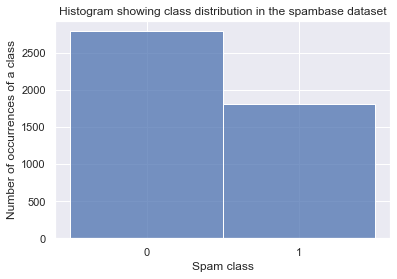

In [28]:
# Answer here

# Plot histogram
sns.set_theme(color_codes=True)
spam_df.spam = spam_df.spam.astype('category')
ax = sns.histplot(data=spam_df.spam, palette="Set2")
ax.set(title='Histogram showing class distribution in the spambase dataset')
ax.set(xlabel='Spam class')
ax.set(ylabel='Number of occurrences of a class')
ax.set_xticks(range(0,2))

# plt.xlabel('Spam class')
# plt.ylabel('Number of occurrences of a class')
# plt.title('Histogram showing class distribution in the spambase dataset')

In [29]:
spam_df.spam = spam_df.spam.astype('int64')
sp = spam_df.spam.sum()/spam_df.shape[0]
nsp = 1-sp
print('The class distribution of the spambase dataset (%spam, %non-spam) is ({0:.2f}%, {1:.2f}%).'.format(sp*100, nsp*100))

The class distribution of the spambase dataset (%spam, %non-spam) is (39.40%, 60.60%).


## Q4:  Recall that correlation measures the strength...
Recall that correlation measures the strength of association or co-occurrence between two variables. Correlation analyses express this strength of association in a single value, the correlation coefficient. Compute the correlation between each feature and the target variable. Which feature has the highest correlation with the target variable?

In [30]:
# Answer here
corrMatrix = spam_df.corr()

# if we want to see the plot...
#sns.set(rc={"figure.figsize":(15, 15)})
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

# first compute the absolute value of correlation coefficients in'corrMatrix.spam'
#then sort the panda series on descending order
max_corr_feature = np.abs(corrMatrix.spam).sort_values(ascending=False).index[1] 

print('The feature with the highest correlation with the spam_class is "{}"'.format(max_corr_feature))

The feature with the highest correlation with the spam_class is "word_freq_your"


## Q5:  Create a pairplot of the 'char_freq_!', 'char_freq_$', and 'char_freq_#' features with the target variable

Create a pairplot of the 'char_freq_!', 'char_freq_\$', and 'char_freq_#' features with the target variable. Which answer best describes what your observe (consider the Seaborn pairplot( ) method, with "hue = spam_class").
- A. Observations with char_freq_\$ values less than 2 are exclusively classified as spam.
- B. Observations with char_freq_\$ values greater than 3 are exclusively classified as not spam.
- C. None of the above.
- D. Observations with char_freq_\$ values greater than 3 are exclusively classified as spam.
- E. Observations with char_freq_\$ values less than 2 are exclusively classified as not spam.

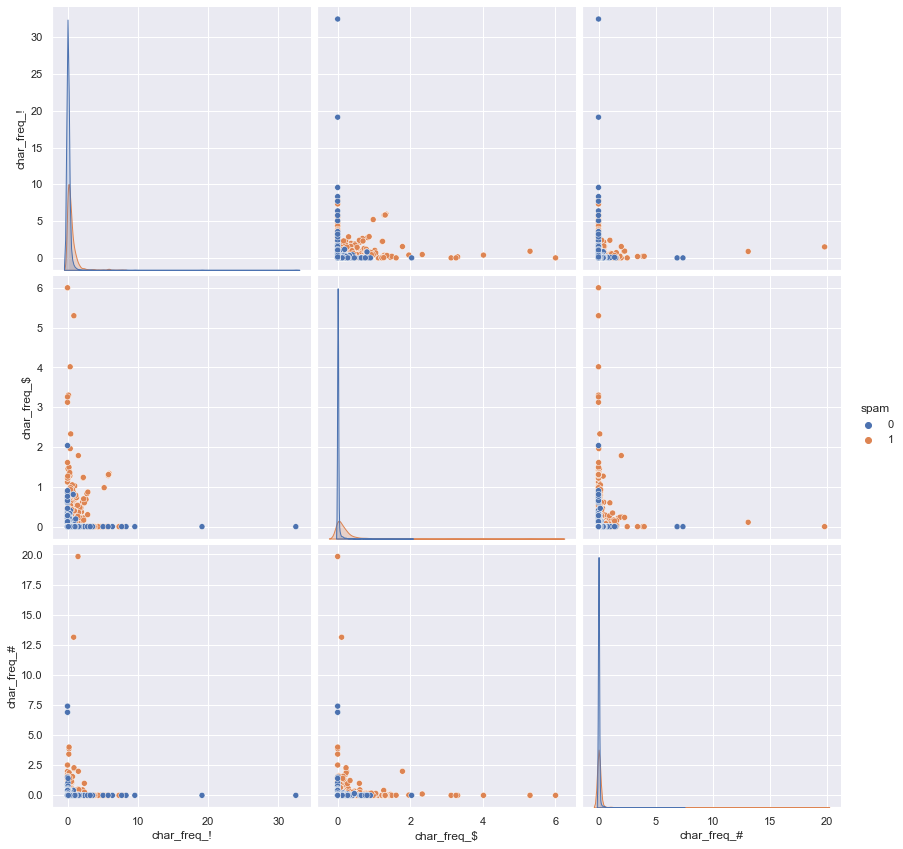

In [31]:
# Answer here

# import seaborn as sns

# create a subset of the datframe
cols = [51,52, 53,57]
spam_df2 = spam_df[spam_df.columns[cols]]


sns.pairplot(spam_df2, hue='spam', height=4)
# Plot pairplot

From the central chart we observe that with char_freq_$ values greater than 3, emails are exclusively classified as spam. **Answer C** is correct


## Q6:  Using the ZeroR classification approach...

I approach this question using montecarlo simulation, generating emails with random feature values and looking at the classification results. No single one of them was classified as spam

In [32]:
# Answer here

# Load libraries
from sklearn.dummy import DummyClassifier
# see the intro to sklearn in the resources folder
# the data structures are important here

dummy_clf = DummyClassifier(strategy="most_frequent")
features = spam_df.drop('spam' , axis =1).to_numpy()
target = spam_df.spam.to_numpy()

dummy_clf.fit(features, target)

num_spam_predictions=0
count = 0
for i in range(1,1001):

    #generate a random email
    test = np.random.rand(1,57)

    # make the dummy prediction
    prediction = dummy_clf.predict(test)
    num_spam_predictions = num_spam_predictions + prediction
    count = i

print ('After "{}" simulations, the numer of emails classified as spam are "{}"'.format(count, int(num_spam_predictions)))
        


After "1000" simulations, the numer of emails classified as spam are "0"


## Q7:  Create a decision tree classifier and depict the graph...

Create a decision tree classifier and depict the graph of the classifier. Inspect the root node of the graph, which feature is used for the splitting rule at this node?

In [33]:
# Answer here

# Load libraries
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
from sklearn import tree

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

# Create DOT data
spam_class_names = np.array(['not_spam', 'spam'])
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=spam_df.columns[0:57],
                                class_names=spam_class_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


Zooming in into the head node we can check it is: **'char_freq_\$'** with a yes/no rule of 'char_freq_\$' <=0.056, GINI coef of 0.478

## Q8: Tree depth is a limit on number of splits a tree can make before coming to a prediction. Pre-prune your decision tree...

Tree depth is a limit on number of splits a tree can make before coming to a prediction. Pre-prune your decision tree to a `max_depth` of 3, and use only the following features: `word_freq_your` and `word_freq_000`. From the resultant decision tree model, what class would your classifier assign an email that contains a `word_freq_your` of 0.7 and a `word_freq_000 of 0.3`?

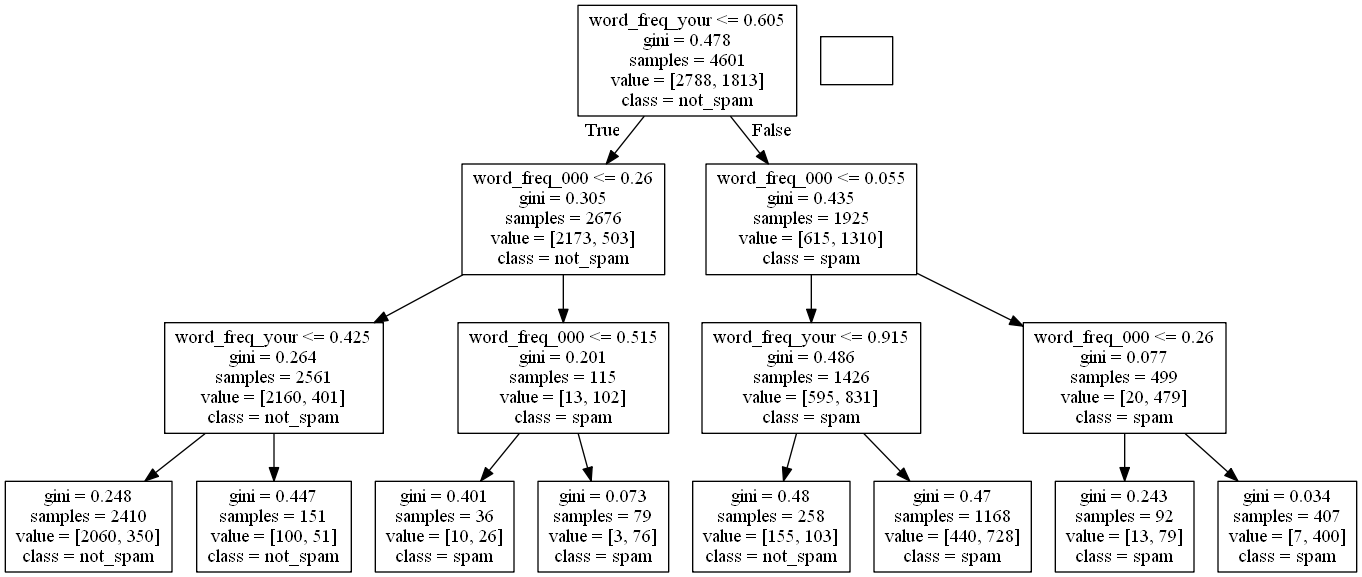

In [38]:
# Answer here

# select the three features:
features3 = spam_df[['word_freq_your','word_freq_000']].to_numpy()
features3_names = np.array(['word_freq_your', 'word_freq_000'])
spam_class_names = np.array(['not_spam', 'spam'])

# Create pruned decision tree classifier object
pruned_decisiontree = DecisionTreeClassifier(random_state=0,
                                             max_depth=3)

# Train model
model = pruned_decisiontree.fit(features3, target)

# Create DOT data
dot_data = tree.export_graphviz(pruned_decisiontree,
                                out_file=None,
                                feature_names=features3_names,
                                class_names=spam_class_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

with the values of word_freq_your of 0.7 and a word_freq_000 of 0.3, we move along the right-most branch until we reach **spam** class

## Q9: Pre-prune your decision tree to a max_depth of 3, with only the following features: `word_freq_your` and `word_freq_000`. But, use `entropy` as...

Pre-prune your decision tree to a max_depth of 3, with only the following features: `word_freq_your` and `word_freq_000`. But, use `entropy` as your impurity criterion.  From the resultant decision tree model, what class would your classifier assign an email that contains a `word_freq_your` of 0.7 and a `word_freq_000 of 0.3`?

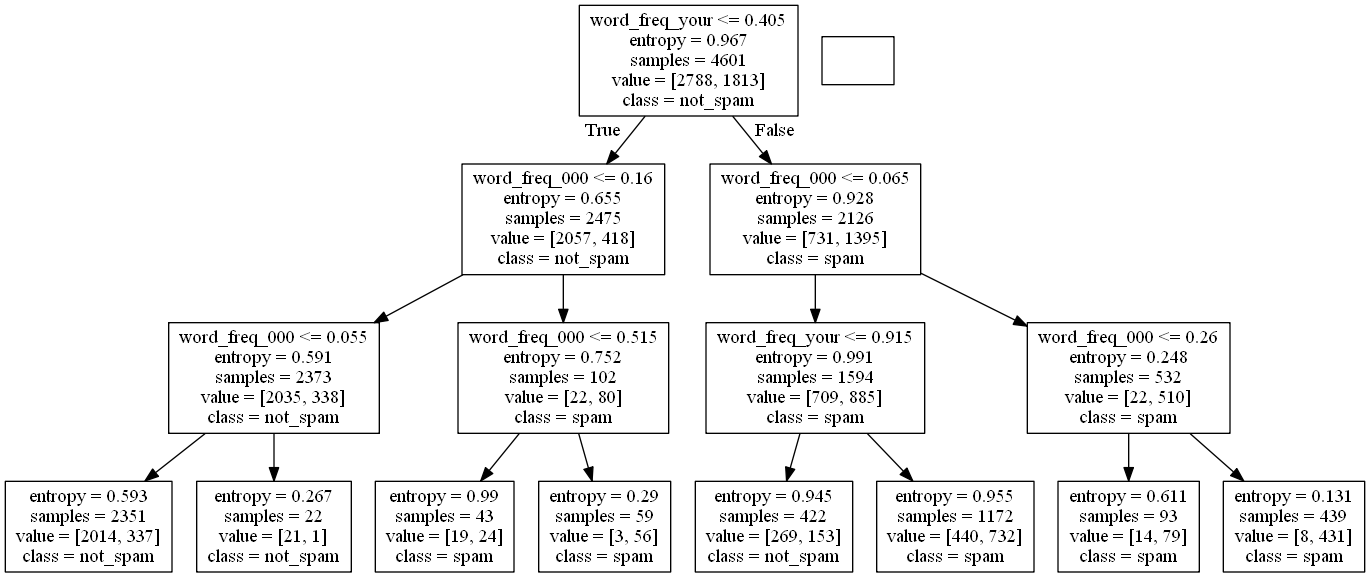

In [39]:
# Answer here

# Create pruned decision tree classifier object
pruned_decisiontree = DecisionTreeClassifier(random_state=0,
                                             max_depth=3, criterion = "entropy")

# Train model
model = pruned_decisiontree.fit(features3, target)

# Create DOT data
dot_data = tree.export_graphviz(pruned_decisiontree,
                                out_file=None,
                                feature_names=features3_names,
                                class_names=spam_class_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

Same as before, with the values of word_freq_your of 0.7 and a word_freq_000 of 0.3, we move along the right-most branch until we reach **spam** class

# Q10:  Train a random forest classifier...

Train a random forest classifier using the spambase data set. Using the method presented in the guided exercise, determine the most important features in the random forest. Which feature is identified as the most important?

In [45]:
# Answer here
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)



In [48]:
# quick visual at the importances
importances = model.feature_importances_

array([0.00369372, 0.00528607, 0.01293154, 0.00092555, 0.03125399,
       0.00648733, 0.07666291, 0.01234023, 0.00490255, 0.00765735,
       0.0075293 , 0.01088465, 0.00333059, 0.00204754, 0.00195654,
       0.06994636, 0.01351473, 0.00885367, 0.03040064, 0.00451882,
       0.05796196, 0.00231536, 0.02836313, 0.04819712, 0.04059003,
       0.0200884 , 0.0207513 , 0.00564298, 0.00223687, 0.00543698,
       0.00177111, 0.00124007, 0.00303634, 0.00098976, 0.00288366,
       0.00361476, 0.01288395, 0.00041765, 0.00288633, 0.00127162,
       0.00126018, 0.0060234 , 0.00160393, 0.00181126, 0.00907684,
       0.01985602, 0.00021595, 0.00133356, 0.00453643, 0.01284037,
       0.00276323, 0.1158793 , 0.07453959, 0.00299262, 0.05950899,
       0.05793365, 0.05012121])

In [80]:
# get the index of the most important feature
i = np.where(model.feature_importances_ == np.max(model.feature_importances_))

# get the name of the feature
print('the most important feature of the random forest model is \033[1m "{}"'.format(names[i[0].item()]))

the most important feature of the random forest model is  "char_freq_!"


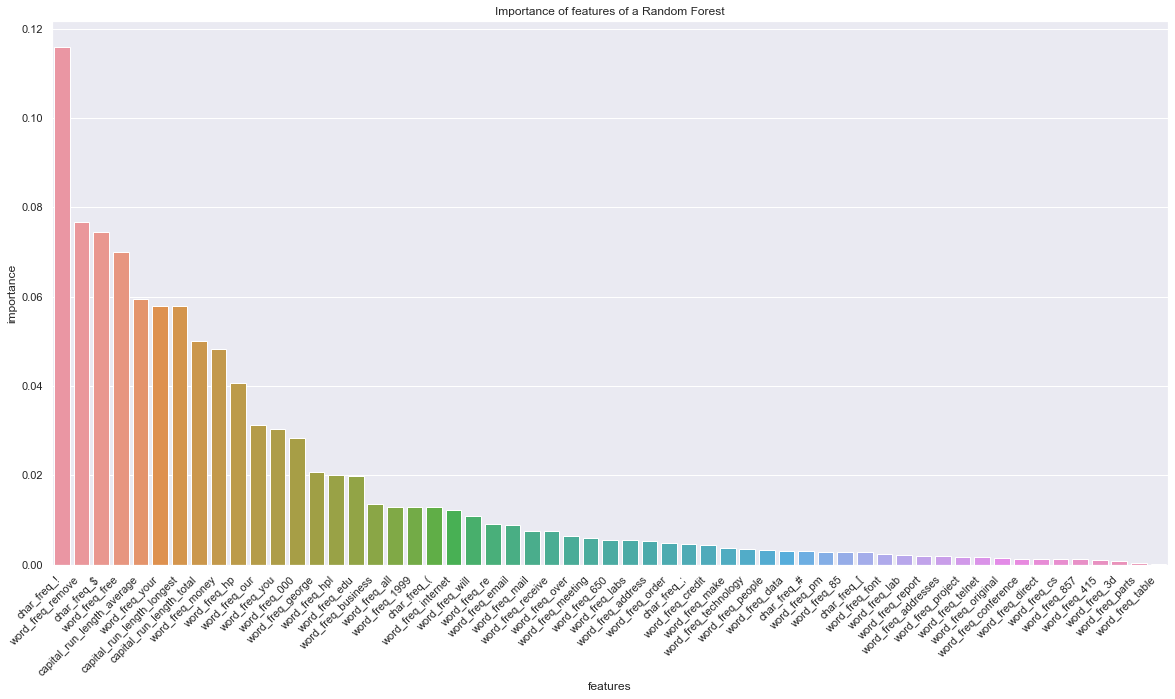

In [115]:
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# trying the barchart with seaborn
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=spam_df.columns[sorted_indices], y=importances[sorted_indices])
ax.set(title='Importance of features of a Random Forest')
ax.set(xlabel='features')
ax.set(ylabel='importance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [120]:
np.argsort(importances)



array([46, 37,  3, 33, 31, 40, 39, 47, 42, 30, 43, 14, 13, 28, 21, 50, 34,
       38, 53, 32, 12, 35,  0, 19, 48,  8,  1, 29, 27, 41,  5, 10,  9, 17,
       44, 11,  7, 49, 36,  2, 16, 45, 25, 26, 22, 18,  4, 24, 23, 56, 55,
       20, 54, 15, 52,  6, 51], dtype=int64)

In [161]:
x = np.array([4, 1, 2])
np.argsort(x, kind ='heapsort')

array([1, 2, 0], dtype=int64)

In [162]:
x[np.argsort(x)]

array([1, 2, 4])